<a href="https://colab.research.google.com/github/gimb99/gbgTPDI/blob/develop/ejercicioIntegrador/ejercicioIntegrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Integrador

## Import de librerias y dependencias

In [ ]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

## Ejercicio 1: Espacios de Color

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.

b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

### Carga de imagen

In [ ]:
!wget https://raw.githubusercontent.com/gimb99/gbgTPDI/refs/heads/develop/ejercicioIntegrador/sample1.jpg
idImage = "sample1.jpg"

--2025-04-22 21:37:41--  https://raw.githubusercontent.com/gimb99/gbgTPDI/refs/heads/develop/ejercicioIntegrador/sample1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256405 (250K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>] 250.40K  --.-KB/s    in 0.02s   

2025-04-22 21:37:41 (9.93 MB/s) - ‘sample1.jpg’ saved [256405/256405]



In [ ]:
imagenCrudo = cv2.imread(idImage)
#Validar si cargo bien
if imagenCrudo is None:
    raise ValueError("La imagen no se pudo cargar. Asegúrate de que la ruta es correcta.")

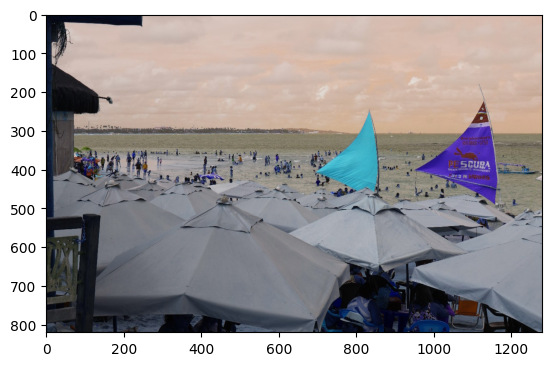

In [ ]:
plt.imshow(imagenCrudo)
plt.show()

#### Pre-procesamiento a RGB

La razon por la que el defecto de display es BGR tiene que ver con un factor historico en la que los manipuladores de fotografias (y proveedores de software) usaban este formato como estandar de la industria, y el formato en si ya esta tomado como default por ser de una historia de codigo que dispone de antiguedad.

Hoy por hoy, las librerias como matplot esperan los canales en orden RGB, de forma que si no procesamos la imagen, no se vera con los valores correctos y por tanto tendra los colores alterados

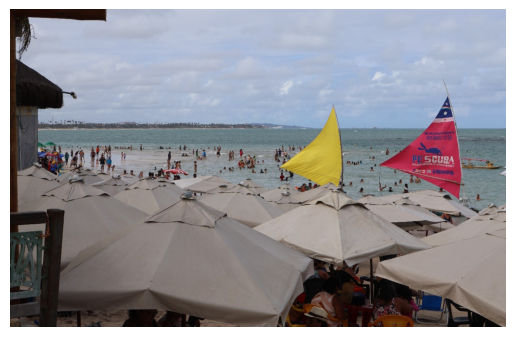

In [ ]:
imagen = cv2.cvtColor(imagenCrudo, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(imagen)

### Valores de canales BGR

Dada la estructura tomada por cv2, esta es almacenada como una matriz que puede ser separada por los 3 canales previamente mencionados. Obtenemos estos valores separados para asi poder tomar la intensidad de colores pixel por pixel de la imagen.

In [ ]:
b_channel, g_channel, r_channel = cv2.split(imagenCrudo)

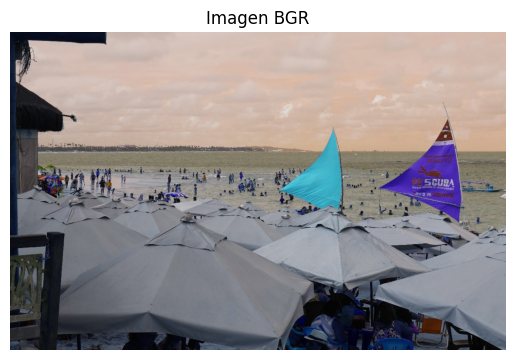

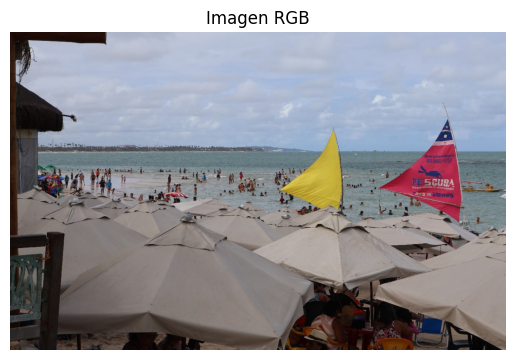

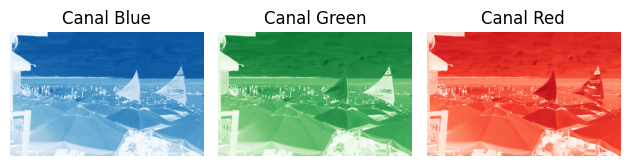

In [ ]:
#plt.figure(figsize=(15, 15))

plt.imshow(imagenCrudo)
plt.title('Imagen BGR')
plt.axis('off')
plt.show()

plt.imshow(imagen)
plt.title('Imagen RGB')
plt.axis('off')
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(b_channel, cmap='Blues') # , cmap='gray'
plt.title('Canal Blue')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g_channel, cmap='Greens') # , cmap='gray'
plt.title('Canal Green')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(r_channel, cmap='Reds') # , cmap='gray'
plt.title('Canal Red')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Get valores de canales inicial

Una forma de interpretar "mayor información" es comparar la intensidad promedio (o mean) de los valores de píxel en cada canal.

En este contexto, intuimos que un mayor promedio podría indicar mayor intensidad general en ese canal.

In [ ]:
promedio_blue = np.mean(b_channel)
promedio_green = np.mean(g_channel)
promedio_red = np.mean(r_channel)

# Redondeo con 2 decimales para evitar numeros altos
print(f"Promedio Blue: {promedio_blue:.2f}")
print(f"Promedio Green: {promedio_green:.2f}")
print(f"Promedio Red: {promedio_red:.2f}")

Promedio Blue: 137.66
Promedio Green: 131.72
Promedio Red: 133.19


Estos valores son elevados dado que no se ha hecho un recorte de imagen para tener un sample mas acotado, probemos realizando un recorte hacia el sector de los dos banderines.

#### Recorte de imagen

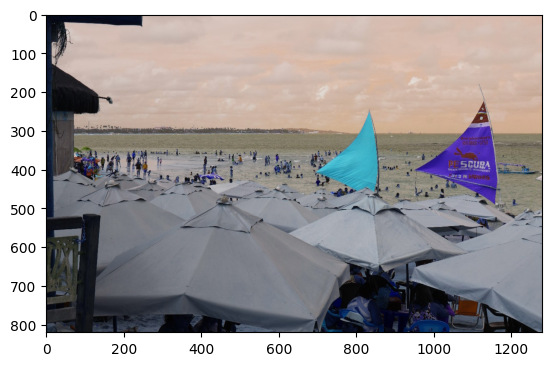

In [ ]:
plt.imshow(imagenCrudo)
plt.axis('on')
plt.show()

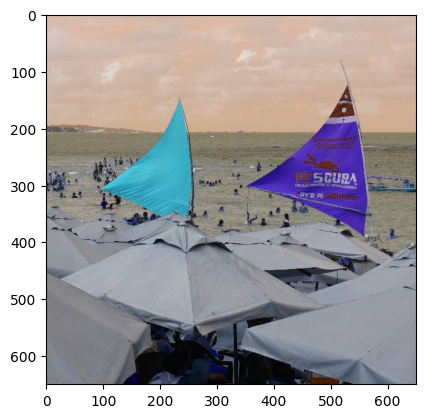

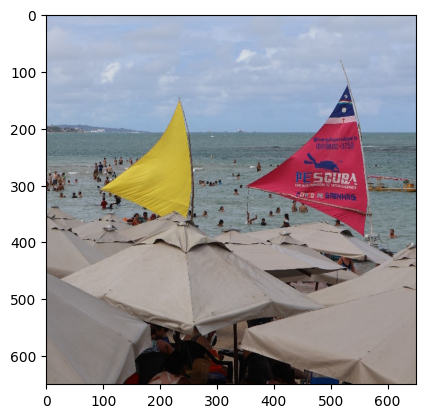

In [ ]:
# Primero alto, despues ancho
imgCrudoNew = imagenCrudo[100:750, 600:1250]
plt.imshow(imgCrudoNew)
plt.show()

imgNew = cv2.cvtColor(imgCrudoNew, cv2.COLOR_BGR2RGB)
plt.imshow(imgNew)
plt.show()

#### Validacion de valores de canales post-recorte

In [ ]:
r_channel, g_channel, b_channel = cv2.split(imgNew)

In [ ]:
promedio_blue = np.mean(b_channel)
promedio_green = np.mean(g_channel)
promedio_red = np.mean(r_channel)

# Redondeo con 2 decimales para evitar numeros altos
print(f"Promedio Blue: {promedio_blue:.2f}")
print(f"Promedio Green: {promedio_green:.2f}")
print(f"Promedio Red: {promedio_red:.2f}")

max_promedio = max(promedio_blue, promedio_green, promedio_red)
if max_promedio == promedio_blue:
    canal_mayor = "Blue"
elif max_promedio == promedio_green:
    canal_mayor = "Green"
else:
    canal_mayor = "Red"

print(f"\nEl canal con mayor información (mayor valor promedio) es: {canal_mayor}")

Promedio Blue: 145.58
Promedio Green: 140.61
Promedio Red: 143.60

El canal con mayor información (mayor valor promedio) es: Blue


A pesar del recorte, no se ha logrado superar el promedio del canal Blue, pero los valores parecen igual de equilibrados entre canales.

## Ejercicio 2: Muestreo y Cuantización


a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.

b) Para cada caso, calcular:

El nuevo tamaño de la imagen

El porcentaje de reducción de datos

c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256)

d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

Para este ejercicio usaremos la misma imagen recortada dado que nos podrá ser util a futuro

### Get dimensiones

In [ ]:
# Obtener dimensiones originales
alto, ancho, _ = imgNew.shape
print(f"Dimensiones originales: {alto} x {ancho}")

# Lista de factores de muestreo
factores = [2, 4, 8]

Dimensiones originales: 650 x 650


### Tabla de muestreo espacial

Para cada factor (2, 4 y 8), se calcula el nuevo tamaño y el porcentaje de reducción

(usando la relación 1 - 1/f², que indica la proporción de píxeles eliminados).

Utilizaremos `cv2.resize` para redimensionar la imagen y visualizar el resultado


Resultados del muestreo espacial:

Factor	Nuevo Tamaño (Alto x Ancho)	Reducción de Datos (%)
2	325 x 325			75.00%


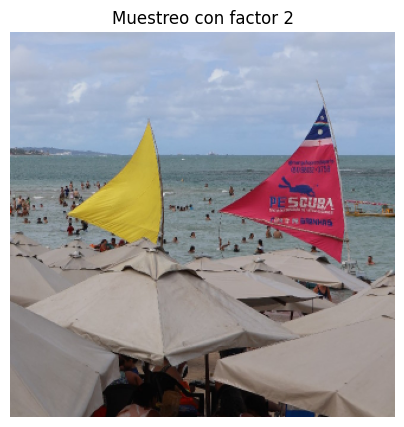


Factor	Nuevo Tamaño (Alto x Ancho)	Reducción de Datos (%)
4	162 x 162			93.75%


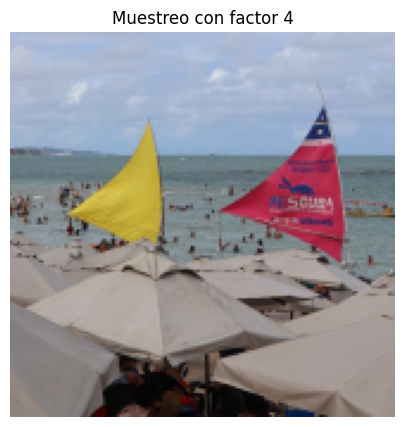


Factor	Nuevo Tamaño (Alto x Ancho)	Reducción de Datos (%)
8	81 x 81			98.44%


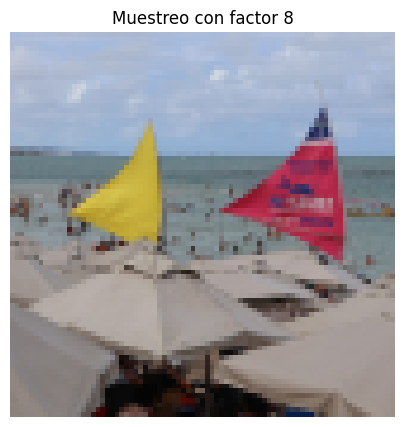

In [ ]:
print("\nResultados del muestreo espacial:")
for f in factores:
  nuevo_alto = alto // f
  nuevo_ancho = ancho // f
  # El número de píxeles se reduce en f^2, por lo tanto, el porcentaje de datos retenidos es 100 / f^2,
  # y la reducción de datos es 100 - (100/f^2)
  porcentaje_reduccion = 100 * (1 - 1/(f**2))
  print("\nFactor\tNuevo Tamaño (Alto x Ancho)\tReducción de Datos (%)")
  print(f"{f}\t{nuevo_alto} x {nuevo_ancho}\t\t\t{porcentaje_reduccion:.2f}%")

  # Redimensionar la imagen
  nuevo_tamano = (nuevo_ancho, nuevo_alto)  # OpenCV utiliza el formato (ancho, alto)
  img_reducida = cv2.resize(imgNew, nuevo_tamano, interpolation=cv2.INTER_AREA)

  # Mostrar la imagen muestreada
  plt.figure(figsize=(5, 5))
  plt.imshow(img_reducida)
  plt.title(f"Muestreo con factor {f}")
  plt.axis("off")
  plt.show()

A raíz de la segmentación, podemos tomar como un umbral de muestreo aceptable el factor 2 o 4, siendo el factor 2 como el más cercano a una imagen identificable considerando que tiene el menor porcentaje de reducción de datos.

De igual forma, dada la resolución de la imagen siendo baja de por sí, la muestra con factor 4 ya muestra una degradación más notable que si se tratara de una imagen de mayores dimensiones.


### Cuantización de 4 niveles diferentes

La cuantización consiste en la reducción del número de niveles de intensidad de la imagen.

Por ejemplo, para una imagen de 8 bits (256 niveles: 0 a 255), se puede mapear esos valores a un conjunto menor de niveles como 32, 64 o 128. En el caso de 256 niveles, estaríamos dejando la imagen sin cambiar, ya que es la escala equivalente al espectro de color posible para dichos 8 bits.

Una forma común de cuantizar es:

1. Dividir cada píxel por el intervalo correspondiente y redondear al entero más cercano.

2. Multiplicar por el mismo intervalo para reescalar los niveles.

La formula es relativamente sencilla -

Siendo L el nivel de cuantización:

pc = [pixel/(255/(L-1))] x [255/(L-1)]

Los niveles a aplicar son: `32, 64, 128, 256`

0  -  32
1  -  64
2  -  128
3  -  256


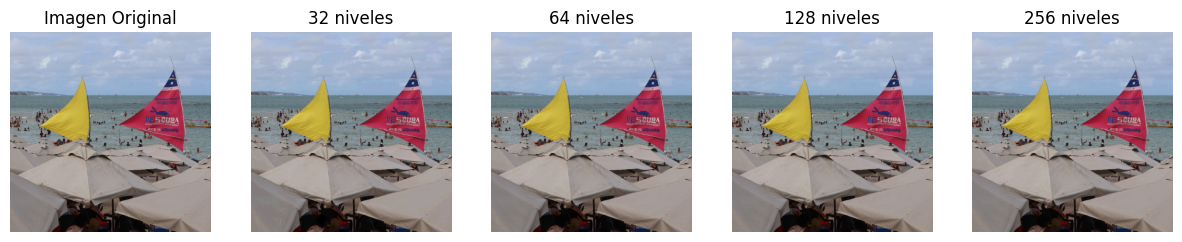

In [ ]:
def cuantizar_imagen(imagen, niveles):
  # Cuantiza la imagen reduciendo los niveles de intensidad a 'niveles'.
  # Usado para prevenir problemas en la división
  imagen_float = imagen.astype(np.float32)
  intervalo = 255 / (niveles - 1)
  # Se usa np.floor con un offset de 0.5 para redondear
  imagen_cuantizada = np.floor(imagen_float / intervalo + 0.5) * intervalo
  return np.clip(imagen_cuantizada, 0, 255).astype(np.uint8)

niveles_list = [32, 64, 128, 256]

# Prueba de enumerate
for i,lvl in enumerate(niveles_list):
  print(i," - ",lvl)

# Visualizar la imagen original y las cuantizaciones
plt.figure(figsize=(15, 5))
plt.subplot(1, len(niveles_list)+1, 1)
plt.imshow(imgNew)
plt.title("Imagen Original")
plt.axis("off")

for i,lvl in enumerate(niveles_list):
  img_cuant = cuantizar_imagen(imgNew, lvl)
  plt.subplot(1, len(niveles_list)+1, i+2)
  plt.imshow(img_cuant)
  plt.title(f"{lvl} niveles")
  plt.axis("off")
plt.show()

Los resultados obtenidos en esta prueba no dieron diferencias visibles, se revisó la fórmula, funciones y prints en más de una ocasión y aún así los niveles se encuentran bien en teoría pero no en la demostración.

A continuación probamos pasando la imagen a una escala de grises para intentar hacer más visibles los cambios de escala

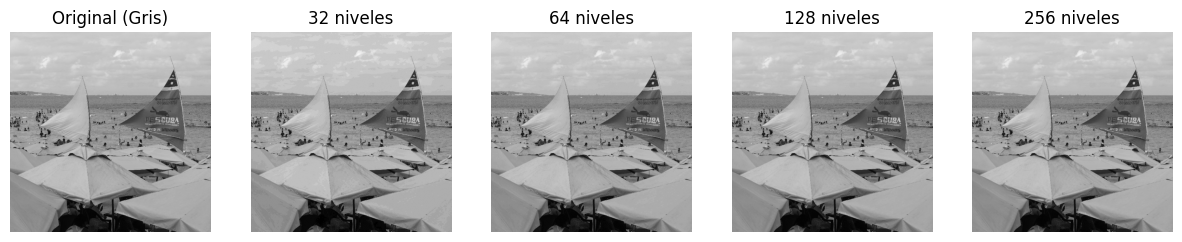

In [ ]:
# Convertir a escala de grises
img_gray = cv2.cvtColor(imgNew, cv2.COLOR_RGB2GRAY)

niveles_list = [32, 64, 128, 256]

plt.figure(figsize=(15, 5))
plt.subplot(1, len(niveles_list)+1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original (Gris)")
plt.axis("off")

for i, lvl in enumerate(niveles_list):
    img_cuant = cuantizar_imagen(img_gray, lvl)
    plt.subplot(1, len(niveles_list)+1, i+2)
    plt.imshow(img_cuant, cmap='gray')
    plt.title(f"{lvl} niveles")
    plt.axis("off")
plt.show()

Nuevamente, esta no ha dado resultados efectivos u observables, dando la idea que puede que la función sea disfuncional.

Se prueba una última vez con una prueba de gradiente pura para validar si este es el caso, o si se trata de un mal input

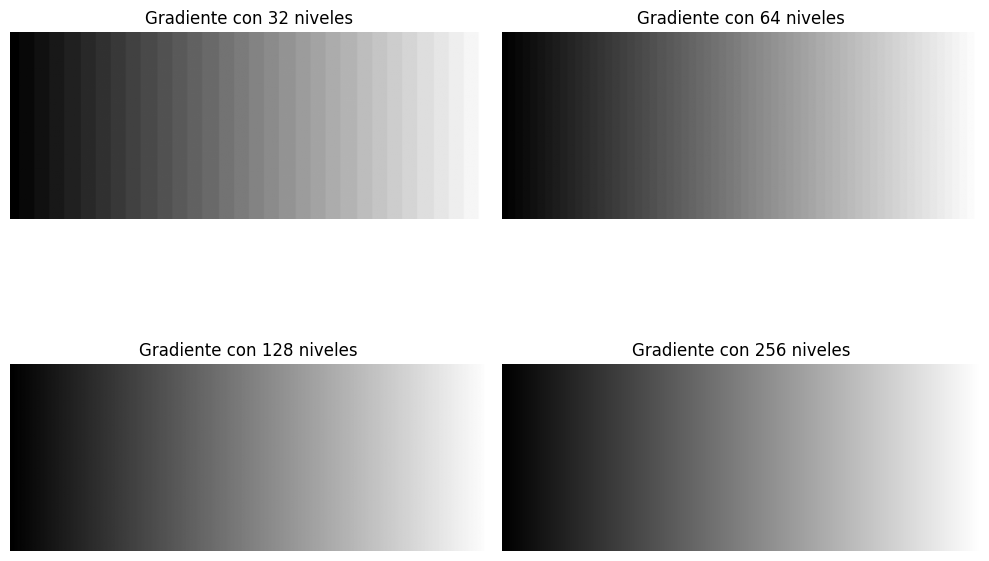

In [ ]:
# Crear una imagen de gradiente horizontal
gradiente = np.tile(np.arange(256, dtype=np.uint8), (100, 1))

niveles_list = [32, 64, 128, 256]
plt.figure(figsize=(10, 8))

for i, lvl in enumerate(niveles_list):
    gradiente_cuant = cuantizar_imagen(gradiente, lvl)
    plt.subplot(2, 2, i+1)
    plt.imshow(gradiente_cuant, cmap='gray')
    plt.title(f"Gradiente con {lvl} niveles")
    plt.axis("off")

plt.tight_layout()
plt.show()

En este caso, es posible notar las diferencias de gradiente, por tanto podemos dar a una conclusión que en mi caso, he elegido una imagen de dimensiones y rango de colores que no es del todo óptima para analizar en valores de cuantización (ejemplo, no tiene un contraste marcado ni moderado, y pareciera que no es una imagen muy clara en terminos de luz).

## Ejercicio 3: Segmentación por Color

Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.

b) Calcular y mostrar el histograma de la imagen en escala de grises.

c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.

d) Dibujar los bordes del objeto segmentado en color rojo.

### Segmentación V1 (Rojos)

#### Segmentacion basado en umbrales RGB


Para extraer, por ejemplo, objetos de color azul en el espacio RGB, definimos umbrales que seleccionen pixeles donde el canal **rojo** tenga un valor alto y los canales azul y verde sean relativamente bajos.

Esto es con el fin de poder capturar la zona del banderín rojo

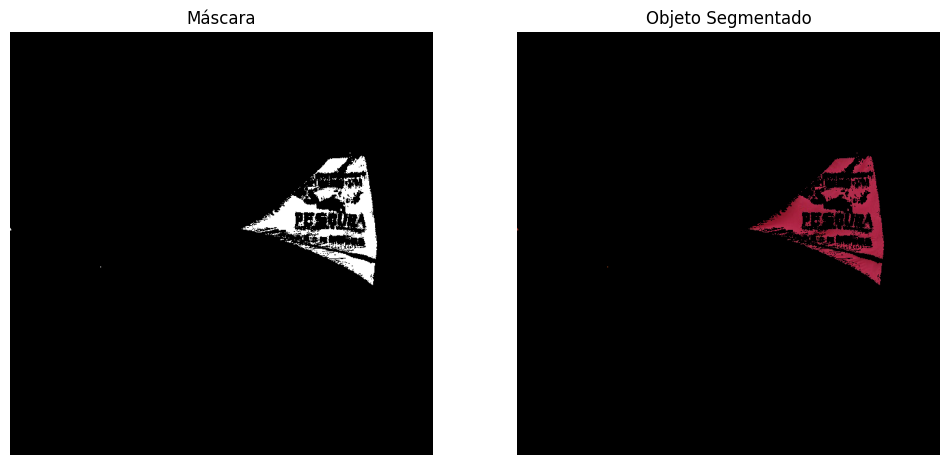

In [ ]:
# Como ejemplo, seleccionamos rangos que resaltan objetos con tonalidades rojizas.
# Puedes ajustar estos valores según el color que quieras extraer.
lower_bound = np.array([140, 10, 10])   # Mínimos valores en R, G, B
upper_bound = np.array([255, 80, 80])   # Máximos valores en R, G, B

# Creamos una máscara que tenga 255 donde la imagen esté en el rango y 0 en caso contrario.
mask = cv2.inRange(imgNew, lower_bound, upper_bound)

# Aplicamos la máscara a la imagen original para extraer únicamente el objeto segmentado.
segmented = cv2.bitwise_and(imgNew, imgNew, mask=mask)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title("Máscara")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented)
plt.title("Objeto Segmentado")
plt.axis("off")
plt.show()

#### Histograma

Para esto vamos a tener que pasar la imagen a una escala de grises

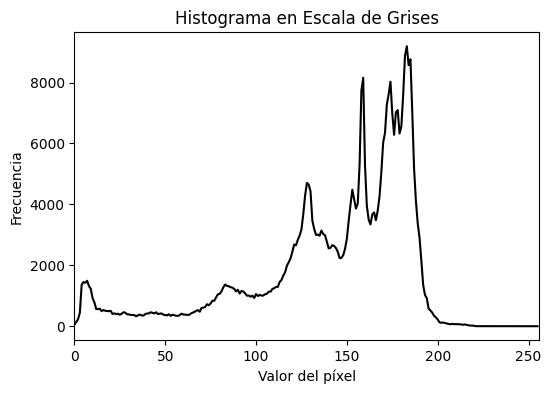

In [ ]:
gray = cv2.cvtColor(imgNew, cv2.COLOR_RGB2GRAY)

# Calculamos el histograma: contamos la frecuencia de cada valor de píxel (0-255).
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.figure(figsize=(6,4))
plt.plot(hist, color='black')
plt.title("Histograma en Escala de Grises")
plt.xlabel("Valor del píxel")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])
plt.show()

#### Coordenadas de Triangulo para Objeto

Encontramos los contornos de la máscara.

Usamos RETR_EXTERNAL para extraer sólo los contornos externos y CHAIN_APPROX_SIMPLE para simplificar los puntos.

Coordenadas del rectángulo: (x, y, width, height): (358, 190, 206, 159)


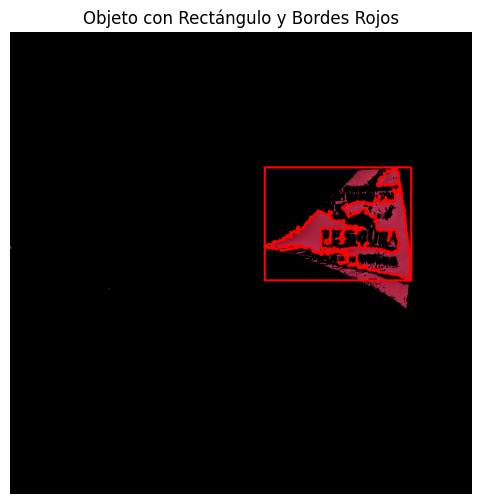

In [ ]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Seleccionamos el contorno más grande (asumiendo que corresponde al objeto de interés).
    largest_contour = max(contours, key=cv2.contourArea)

    # Obtenemos el rectángulo envolvente (bounding box) del contorno.
    x, y, w, h = cv2.boundingRect(largest_contour)
    print(f"Coordenadas del rectángulo: (x, y, width, height): ({x}, {y}, {w}, {h})")

    # 6. Dibujar el rectángulo y los bordes del objeto segmentado en color rojo.
    # Hacemos una copia de la imagen original para dibujar.
    image_with_markings = segmented.copy()

    # Dibujar el rectángulo (en rojo: [255, 0, 0])
    cv2.rectangle(image_with_markings, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Dibujar el contorno sobre el objeto segmentado en rojo.
    cv2.drawContours(image_with_markings, [largest_contour], -1, (255, 0, 0), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(image_with_markings)
    plt.title("Objeto con Rectángulo y Bordes Rojos")
    plt.axis("off")
    plt.show()

else:
    print("No se encontraron contornos para el objeto segmentado.")

A raiz de rectángulo obtenido con la imagen segmentada, podemos decir que al menos se selecciona una parte del objeto intencionado (en este caso, el banderín derecho), pero se da a notar que dadas las "lagunas" de color en el mismo, se llega a contornear el sector con mayor cantidad de píxeles agrupados de la máscara con el mismo tono de color.

Es decir, sabemos que el banderín es de forma "triangular", pero no se selecciona la totalidad del mismo por tener contenido con colores azules y blancos que se escapan de la captura de segmentado.

Podríamos probar un segmentado atrapando el banderín amarillo ya que este no dispone de elementos gráficos internos en el mismo y podríamos capturar una mejor máscara si lo "tuneamos" para que tenga colores amarillos.

### Segmentación V2 (amarillos)

#### Segmentación por umbrales RGB

Dado que en el esquema RGB, el color "amarillo" equivale a `(255, 255, 0)`, ajustamos...

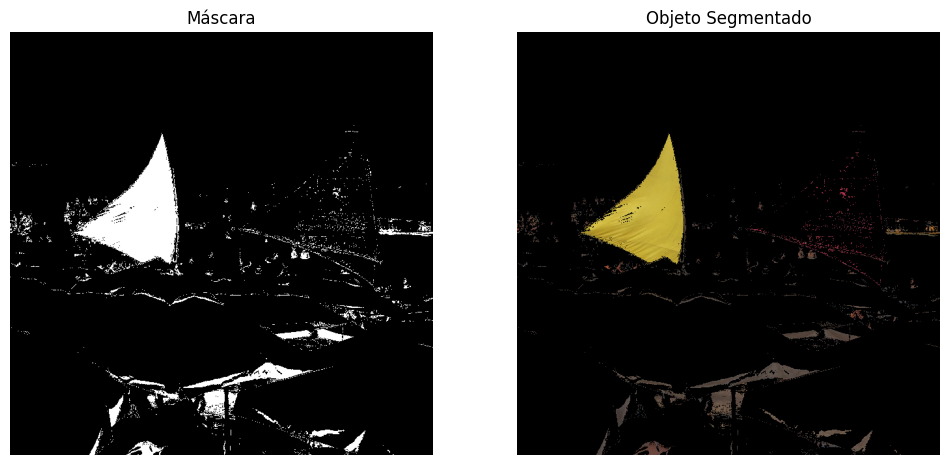

In [42]:
# Como ejemplo, seleccionamos rangos que resaltan objetos con tonalidades rojizas.
# Puedes ajustar estos valores según el color que quieras extraer.
lower_bound = np.array([50, 50, 10])   # Mínimos valores en R, G, B
upper_bound = np.array([255, 255, 80])   # Máximos valores en R, G, B

# Creamos una máscara que tenga 255 donde la imagen esté en el rango y 0 en caso contrario.
mask = cv2.inRange(imgNew, lower_bound, upper_bound)

# Aplicamos la máscara a la imagen original para extraer únicamente el objeto segmentado.
segmented = cv2.bitwise_and(imgNew, imgNew, mask=mask)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title("Máscara")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented)
plt.title("Objeto Segmentado")
plt.axis("off")
plt.show()

#### Histograma

In [ ]:
### Desarrollame

#### Coordenadas de Triangulo para Objeto

Coordenadas del rectángulo: (x, y, width, height): (94, 157, 166, 201)


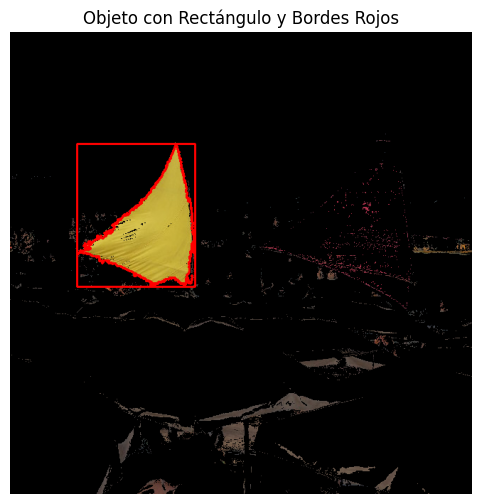

In [44]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Seleccionamos el contorno más grande (asumiendo que corresponde al objeto de interés).
    largest_contour = max(contours, key=cv2.contourArea)

    # Obtenemos el rectángulo envolvente (bounding box) del contorno.
    x, y, w, h = cv2.boundingRect(largest_contour)
    print(f"Coordenadas del rectángulo: (x, y, width, height): ({x}, {y}, {w}, {h})")

    # 6. Dibujar el rectángulo y los bordes del objeto segmentado en color rojo.
    # Hacemos una copia de la imagen original para dibujar.
    image_with_markings = segmented.copy()

    # Dibujar el rectángulo (en rojo: [255, 0, 0])
    cv2.rectangle(image_with_markings, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Dibujar el contorno sobre el objeto segmentado en rojo.
    cv2.drawContours(image_with_markings, [largest_contour], -1, (255, 0, 0), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(image_with_markings)
    plt.title("Objeto con Rectángulo y Bordes Rojos")
    plt.axis("off")
    plt.show()

else:
    print("No se encontraron contornos para el objeto segmentado.")

Ante este cambio (mencionado al final de V1), podemos observar un mejor contorneado a raíz de haber seleccionado un objeto que, a pesar de requerir un posible parametrizado más específico, pudimos obtener un sector más claro